In [354]:
import numpy as np
import matplotlib.pyplot as plt
from modules.Particle import Particle
from modules.Direct_Classes import Direct
from modules.FMM_Classes import FMM
from modules.Analytic_Classes import SingleParticle
%load_ext autoreload
%autoreload 2
from modules.testing import PointTesting
import copy
import modules.Utility as util


# Create particle distribution to be used in all simulations
#np.random.seed(100)
n_particles = 2000
max_property = 0 # property could be mass or charge 
box_size = 1000

# Generate initial particles
#initial_positions = np.random.beta(2,2,(n_particles,2)) * box_size
initial_positions=[]
for x in np.linspace(0, box_size, int(np.sqrt(n_particles)), False):
    for y in np.linspace(0, box_size, int(np.sqrt(n_particles)), False):
        initial_positions.append(np.array([x, y])) 
initial_positions = np.array(initial_positions)
print(initial_positions)
#initial_positions = np.random.uniform(0,1,(n_particles,2)) * box_size

initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_property)))
point = 580
charge = 1
initial_particles.append(Particle(np.array([point,point]), charge))



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[  0.           0.        ]
 [  0.          22.72727273]
 [  0.          45.45454545]
 ...
 [977.27272727 931.81818182]
 [977.27272727 954.54545455]
 [977.27272727 977.27272727]]


## Analytic Potential Graph

/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/Analytic_Classes.py:13: RuntimeWarning: divide by zero encountered in log
  particle.total_potential = -self.property * np.log(abs(particle.complex_position - self.complex_position))


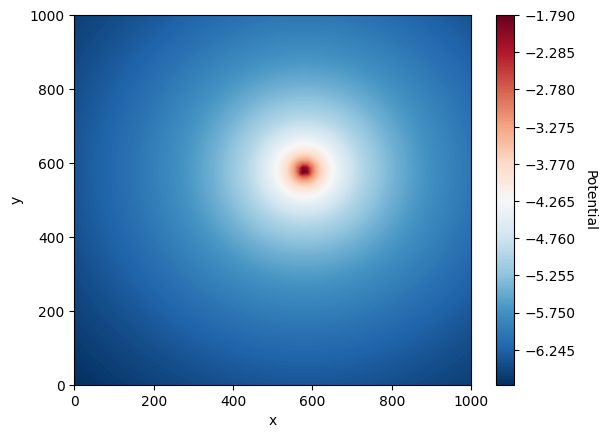

In [355]:
analytic_simulation = SingleParticle([point, point], charge, box_size)
analytic_simulation.plot_potential()
analytic_particles = copy.deepcopy(initial_particles)
analytic_simulation.evaluate_particle_potentials(analytic_particles)

## Direct Calculation Potential Graph

In [356]:
# # direct Simulation
# direct_particles = copy.deepcopy(initial_particles)
# direct_simulation = Direct(box_size, direct_particles)
# direct_simulation.run()
# direct_simulation.plot_potential()

## FMM Potential Grpah

In [357]:
# FMM Simulation
expansion_order = 10
n_levels = 3
fmm_particles = copy.deepcopy(initial_particles)
fmm_simulation = FMM(box_size, expansion_order, fmm_particles, n_levels)
fmm_simulation.run()
#fmm_simulation.plot_potential()


#initial_particles.append(Particle([box_size/2, box_size/2], 100))
#n_particles += 1



# analytic_particles = analytic_simulation.particles
# test_particles = point_test.particles
# for i, analytic_particle in enumerate(analytic_particles):
#     if abs(analytic_particle.complex_position - test_meshbox.complex_centre) > r:
#         analytic_particle.total_potential -= test_particles[i].total_potential
#     else:
#         analytic_particle.total_potential = np.infty
# analytic_simulation.plot_potential()


1
fine 2 [2, 2] [625. 625.]
[1.0, -63.63961030678928, -2025.0000000000002, -85913.47391416553, -4100625.0000000005, -208769741.61142224, -11071687500.000002, -603941038233.0431, -33630250781250.01, -1902414270434085.5, -1.0896201253125003e+17]
2
coarse level:  1
coarse 1 [1, 1] [750. 750.]
[ 1.00000000e+00 -2.40416306e+02 -2.89000000e+04 -4.63202082e+06
 -8.35210000e+08 -1.60638482e+11 -3.21834253e+13 -6.63207447e+15
 -1.39515149e+18 -2.98148592e+20 -6.45118048e+22]
coarse level:  0
coarse 0 [0, 0] [500. 500.]
[ 1.00000000e+00 -5.93969696e+02 -1.76400000e+05 -6.98508363e+07
 -3.11169600e+10 -1.47860250e+13 -7.31870899e+15 -3.72607831e+18
 -1.93653040e+21 -1.02243589e+24 -5.46566340e+26]
3
local expansion level:  1
local expansion psi 1 [0, 0] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
local expansion psi 1 [0, 1] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
local expansion psi 1 [1, 0] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
local expansion psi 1 [1, 1] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
parent 1 [0, 0]
chil

[-6.386828312192075, -6.41221026905165, -6.433876473127978, -6.451163785625932, -6.463311792231569, -6.469608276805441, -6.469608276805441, -6.463311792231569, -6.451163785625932, -6.433876473127978, -6.41221026905165, -6.100049772888783, -6.133721214364399, -6.16224669960972, -6.184868770637457, -6.200694181656068, -6.208873969259273, -6.208873969259273, -6.200694181656068, -6.184868770637457, -6.16224669960972, -6.133721214364399, -5.958070773209073, -5.996780504428726, -6.0294247057273385, -6.055219038687096, -6.073215546430682, -6.082502311833223, -6.082502311833223, -6.073215546430682, -6.055219038687097, -6.0294247057273385, -5.996780504428726, -6.100049772888783, -6.133721214364399, -6.16224669960972, -6.184868770637457, -6.200694181656068, -6.208873969259273, -6.208873969259273, -6.200694181656068, -6.184868770637457, -6.16224669960972, -6.133721214364399, -6.41221026905165, -6.439527534671157, -6.463311792231569, -6.482725924753104, -6.496686707687234, -6.504055044068435, -6.5

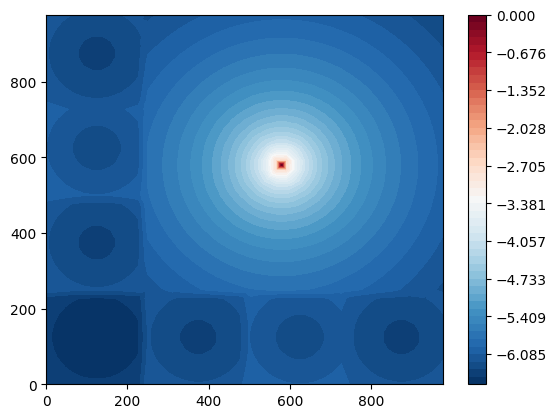

In [358]:
util.plot_potentials(fmm_particles, [None,0])

In [359]:
print(fmm_simulation.mesh.meshboxes[2][3][3].psi_coeffs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Multipole Expansion About a Specified Meshbox
This is then also compared to the analytic result

[1.0, -63.63961030678928, -2025.0000000000002, -85913.47391416553, -4100625.0000000005, -208769741.61142224, -11071687500.000002, -603941038233.0431, -33630250781250.01, -1902414270434085.5, -1.0896201253125003e+17]
32.141217326661256
-6.7096016938204635
[-2.5757174171303632e-14, 1.4636342018370385e-05, 6.20153291102099e-05, 0.00014781253984441634, 0.00027835941267895237, 0.0004606708508836377, 0.0007024599070302173, 0.0010121347524014723, 0.001398772398316872, 0.0018720630143436168, 0.002442218297383114, 0.00311983733134813, 0.003915723910185243, 0.0048406505605491645, 0.005905066667481584, 0.00711875130493933, 0.008490415642216753, 0.010027265036790745, 0.011734536847013644, 0.013615036100501854, 0.01566869671782989, 0.017892200135398717, 0.020278684961739124, 0.022817579911569297, 0.025494587166922322, 0.028291834470410393, 0.031188202220477024, 0.03415981777812682, 0.03718069475581398, 0.04022348211025495, 0.04326027815904876, 0.046263459494599424, 0.04920647479057205, 0.0520645585

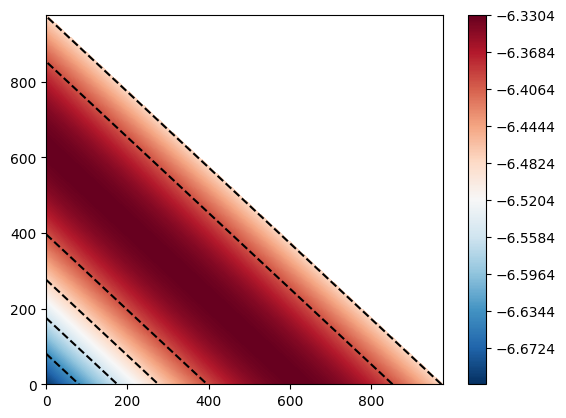

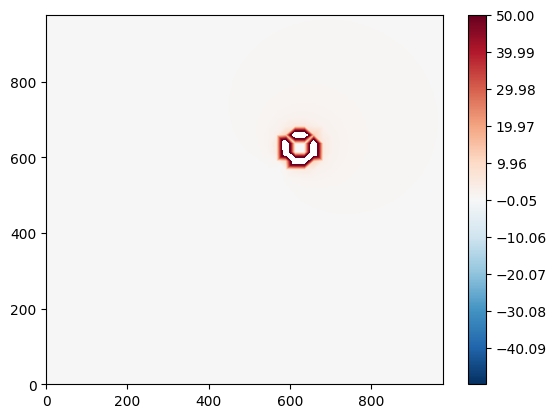

In [360]:
test_meshbox = fmm_simulation.mesh.meshboxes[2][2][2]
print(test_meshbox.mpe_coefficients)
r = (box_size / int(np.sqrt(n_particles))) * (2**(test_meshbox.mesh.n_levels-test_meshbox.level))*np.sqrt(2)
print(r)
test_particles = copy.deepcopy(initial_particles)
point_test = PointTesting(test_particles, test_meshbox, r)
point_test.test_mpe()
point_test.plot()
point_test.plot_difference(point_test.particles, analytic_particles, [-50,50])

[-0.32277338162836244, -0.27780411185291065, -0.2365828103864036, -0.19980834807362058, -0.16828094948981764, -0.14275696903628, -0.12373005647831548, -0.11125362607627842, -0.10494097522864543, -0.10414303368403921, -0.1081673598407411, -0.403201972766114, -0.35299758138958026, -0.3086128458361648, -0.2708891395537236, -0.24080589459775048, -0.2192994465582725, -0.20699123015811516, -0.20396694056381648, -0.2097749046621944, -0.22364370893007646, -0.24475093233947742, -0.4143804596438079, -0.3710993773411815, -0.335374023011199, -0.3080166160349078, -0.28998941088303365, -0.28220460651432333, -0.2852254834920105, -0.2990246907728116, -0.3229850597235453, -0.3561428953388761, -0.39748827222018424, -0.30418733350290417, -0.28167406072596624, -0.265414255824699, -0.2560797776179333, -0.25447663492783246, -0.2613663970101783, -0.27719697214536154, -0.3018843358102279, -0.33481341727368985, -0.3750581507350459, -0.42165249174473285, -0.27780411185291065, -0.23010081174070152, -0.1859308654

/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/Utility.py:107: RuntimeWarning: invalid value encountered in divide
  relative_differences = np.abs(np.array(potential_differences) / np.array(reference_potentials))
/Users/thomashartigan/Documents/Uni/part II/Computing_Project/modules/Utility.py:108: RuntimeWarning: divide by zero encountered in log10
  log_potential_differences = np.log10(relative_differences)


-1.7976931348623157e+308
[-6.386828312192075, -6.41221026905165, -6.433876473127978, -6.451163785625932, -6.463311792231569, -6.469608276805441, -6.469608276805441, -6.463311792231569, -6.451163785625932, -6.433876473127978, -6.41221026905165, -6.100049772888783, -6.133721214364399, -6.16224669960972, -6.184868770637457, -6.200694181656068, -6.208873969259273, -6.208873969259273, -6.200694181656068, -6.184868770637457, -6.16224669960972, -6.133721214364399, -5.958070773209073, -5.996780504428726, -6.0294247057273385, -6.055219038687096, -6.073215546430682, -6.082502311833223, -6.082502311833223, -6.073215546430682, -6.055219038687097, -6.0294247057273385, -5.996780504428726, -6.100049772888783, -6.133721214364399, -6.16224669960972, -6.184868770637457, -6.200694181656068, -6.208873969259273, -6.208873969259273, -6.200694181656068, -6.184868770637457, -6.16224669960972, -6.133721214364399, -6.41221026905165, -6.439527534671157, -6.463311792231569, -6.482725924753104, -6.496686707687234,

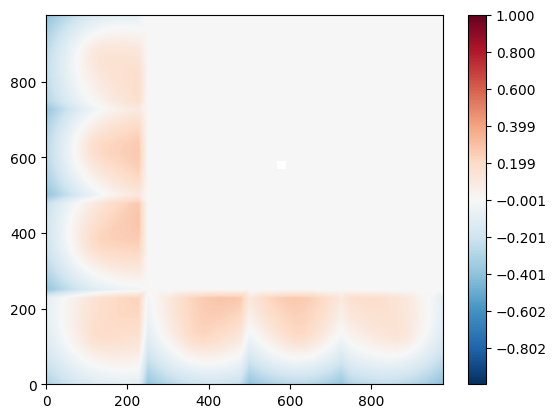

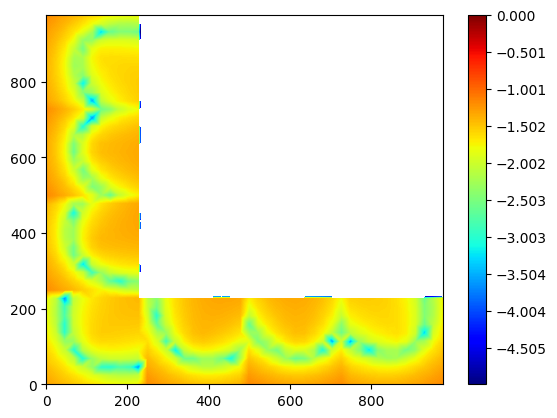

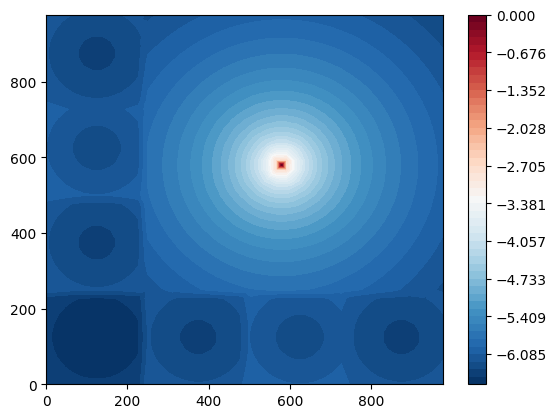

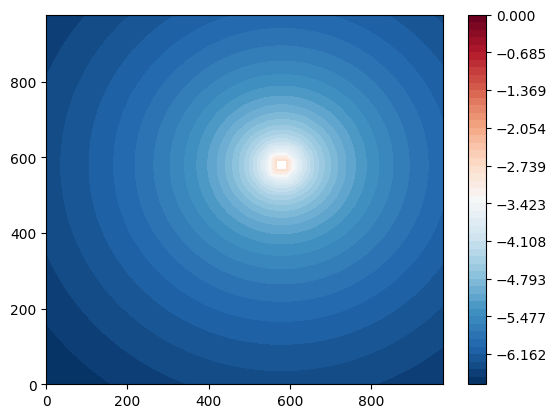

In [361]:
util.plot_difference(analytic_particles, fmm_particles, [-1,1])
util.plot_log_relative_errors(fmm_particles, analytic_particles, [-5,0])
util.plot_potentials(fmm_particles, [None,0])
util.plot_potentials(analytic_particles, [None,0])
#fmm_simulation.plot_potential()
#analytic_simulation.plot_potential()